In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# seaborn 畫圖會比較漂亮, 但這裡可能不用
# import seaborn as sns
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.datasets import mnist
from keras.optimizers import SGD

Using TensorFlow backend.


keras 裡有分兩種：
Tensorflow backend
Theano backend
兩種的指令順序不同

從keras裡匯入資料

In [3]:
(x0_train, y0_train), (x0_test, y0_test) = mnist.load_data()

從訓練資料試跑一筆資料

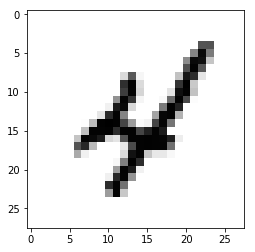

In [4]:
plt.imshow(x0_train[9], cmap='Greys')

In [5]:
y0_train[9]

4

轉換訓練資料



In [6]:
num_train = len(x0_train)
num_test = len(x0_test)

In [7]:
print("訓練資料 "+str(num_train)+" 筆")
print("測試資料 "+str(num_test)+" 筆")

訓練資料 60000 筆
測試資料 10000 筆


In [8]:
x_train = x0_train.reshape(num_train, 28*28) # 注意 28*28 只是個數字
x_test = x0_test.reshape(num_test, 28*28)

In [32]:
y_train = np.zeros((num_train, 10))
y_test = np.zeros((num_test,10))
print(y_train[0], len(y_test))
y_test.ravel()

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] 10000


array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

y_train 已轉成 10000 個 dim=10 的 array , 從第一個位置代表0，到第十個位置代表9
根據 y0_train[i] 的值給 y_train[i] 對應的位置 1
例如：
y0_train[0] = 5
則我們令第1個array中的第6個位置是1，其餘是0
array的計數由0開始，所以是 y_train[i][y0_train[i]]

In [43]:
for i in range(num_train):
    y_train[i][y0_train[i]] = 1
for i in range(num_test):
    y_test[i][y0_test[i]] = 1

In [57]:
y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [53]:
y_train[0][y0_train[0]]

1.0

In [56]:
y0_train[1]

0

建置神經網路

In [11]:
model = Sequential()

第一層設定input dimension = 784 及第一層神經元500個

In [17]:
model.add(Dense(input_dim=784, units=500))
model.add(Activation('sigmoid'))

第二層神經元個數 500個

In [18]:
model.add(Dense(units=500))
model.add(Activation('sigmoid'))

輸出層 維度 = 10 

In [19]:
model.add(Dense(units=10))
model.add(Activation('softmax'))

loss function is mean squared error
optimizer is stochastic gradient descent with learning rate = 0.1

In [15]:
model.compile(loss='mse', optimizer=SGD(lr=0.1), metrics=['accuracy'])

In [21]:
model.fit(x_train, y_train, batch_size=100, verbose=2, epochs=20)

Epoch 1/20
13s - loss: 0.0831 - acc: 0.4024
Epoch 2/20
11s - loss: 0.0623 - acc: 0.6554
Epoch 3/20
12s - loss: 0.0442 - acc: 0.7825
Epoch 4/20
11s - loss: 0.0324 - acc: 0.8458
Epoch 5/20
12s - loss: 0.0253 - acc: 0.8720
Epoch 6/20
12s - loss: 0.0212 - acc: 0.8876
Epoch 7/20
12s - loss: 0.0186 - acc: 0.8976
Epoch 8/20
12s - loss: 0.0168 - acc: 0.9053
Epoch 9/20
12s - loss: 0.0154 - acc: 0.9110
Epoch 10/20
11s - loss: 0.0144 - acc: 0.9163
Epoch 11/20
11s - loss: 0.0136 - acc: 0.9205
Epoch 12/20
11s - loss: 0.0129 - acc: 0.9244
Epoch 13/20
11s - loss: 0.0122 - acc: 0.9273
Epoch 14/20
11s - loss: 0.0117 - acc: 0.9313
Epoch 15/20
11s - loss: 0.0112 - acc: 0.9342
Epoch 16/20
11s - loss: 0.0108 - acc: 0.9365
Epoch 17/20
11s - loss: 0.0104 - acc: 0.9392
Epoch 18/20
11s - loss: 0.0100 - acc: 0.9412
Epoch 19/20
12s - loss: 0.0097 - acc: 0.9433
Epoch 20/20
11s - loss: 0.0094 - acc: 0.9450


評估訓練模型

In [59]:
score = model.evaluate(x_test, y_test)

 9920/10000 [============================>.] - ETA: 0s 

In [23]:
print("Total Loss on Testing Set:", score[0])
print("Accuracy of Testing Set:", score[1])

Total Loss on Testing Set: 0.0105684409971
Accuracy of Testing Set: 0.9335


In [26]:
result = model.predict_classes(x_test)

 9952/10000 [============================>.] - ETA: 0s

以訓練好的模型 model 測試 x0_test 裡第 888 個

In [27]:
no_test=888

先看一下圖片顯示為2

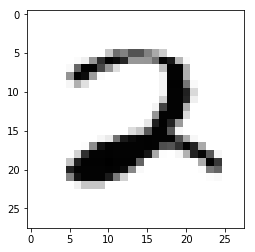

In [28]:
plt.imshow(x0_test[no_test], cmap="Greys")

In [29]:
nn_predict = result[no_test]
print('神經網路的判斷是：{}'.format(nn_predict))

神經網路的判斷是：2


儲存訓練結果
model 存到 .json 檔
weights 存到 .h5 檔

In [30]:
model_json = model.to_json()
open('handwriting_model_architecture.json', 'w').write(model_json)
model.save_weights('handwriting_model_weights.h5')